 Microsoft Movie Studio Analysis

**Business Understanding**

Microsoft wants to start a new movie studio but doesn’t know what types of films to produce.
The goal of this analysis is to:

## Business Problem
What types of movies are most successful at the box office, and how can Microsoft use this knowledge to maximize revenue?
Microsoft needs data-driven insightsto decide what kinds of films to produce

Objectives

Identify characteristics of successful movies
   - Revenue patterns
   - Runtime and ratings
   - Time trends (decades/modern performance)

Analyze revenue distributio to understand profitability dynamics.
Generate actionable recommendations for Microsoft’s new movie studio.


DATA UNDERSTANDING

In [85]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

basics = pd.read_csv('/content/imdb.title.basics.csv')
ratings = pd.read_csv('/content/imdb.title.ratings.csv.gz')
gross = pd.read_csv('/content/bom.movie_gross.csv')

In [86]:
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [87]:
basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [88]:
ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [89]:
#data understanding
basics.info

<bound method DataFrame.info of            tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
3                   NaN          Comedy,Drama  
4                  80.0  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139            123.0                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142            116.0                   NaN  
146143              NaN           Documentary  

[146144 rows x 6 columns]>

In [90]:
gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]>

In [91]:
ratings.info

<bound method DataFrame.info of            tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

### Observations:
- `bom.movie_gross` has domestic and foreign gross; some are missing.
- `imdb.title.basics` contains title, year, runtime, and genres.
- `imdb.title.ratings` provides average rating and number of votes.
- We'll merge datasets to link revenue, runtime, genre, and ratings.

**DATA PREPARATION**

In [92]:
#check revenue columns
gross['domestic_gross'] = gross['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
gross['foreign_gross'] = gross['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)

print(gross[['domestic_gross', 'foreign_gross']].head(10))

   domestic_gross  foreign_gross
0     415000000.0    652000000.0
1     334200000.0    691300000.0
2     296000000.0    664300000.0
3     292600000.0    535700000.0
4     238700000.0    513900000.0
5     300500000.0    398000000.0
6     312400000.0    311500000.0
7     200800000.0    391000000.0
8     251500000.0    291600000.0
9     217600000.0    277300000.0


In [93]:
#calculate total gross
gross['total_gross'] = gross['domestic_gross'] + gross['foreign_gross']
print(gross['total_gross'].head(10))

0    1.067000e+09
1    1.025500e+09
2    9.603000e+08
3    8.283000e+08
4    7.526000e+08
5    6.985000e+08
6    6.239000e+08
7    5.918000e+08
8    5.431000e+08
9    4.949000e+08
Name: total_gross, dtype: float64


In [94]:
#merge datasets
merged_data = pd.merge(basics, ratings, on='tconst', how='inner')
merged_data = pd.merge(merged_data, gross, left_on='primary_title', right_on='title', how='inner')
merged_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,NaN
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015,652301019.4


In [95]:
#convert columns to numeric
merged_data['start_year'] = pd.to_numeric(merged_data['start_year'], errors='coerce')
merged_data['runtime_minutes'] = pd.to_numeric(merged_data['runtime_minutes'], errors='coerce')

In [96]:
#drop missing rows
merged_data.dropna(inplace=True)

In [97]:
plot_df = merged_data[['total_gross','runtime_minutes','averagerating']].dropna()

In [98]:
print(merged_data.shape)
print(merged_data[['total_gross','runtime_minutes','averagerating']].dtypes)
print(merged_data[['total_gross','runtime_minutes','averagerating']].head(10))

(1767, 14)
total_gross        float64
runtime_minutes    float64
averagerating      float64
dtype: object
    total_gross  runtime_minutes  averagerating
1     8744000.0            124.0            6.1
2   188100000.0            114.0            7.3
3    53200000.0            114.0            6.5
4   652301019.4            124.0            7.0
5   235600000.0            110.0            6.6
6    23900000.0            119.0            6.2
8    54800000.0             92.0            5.1
9   591800000.0            100.0            7.8
10  284200000.0            132.0            6.6
12  174800000.0            119.0            6.0


In [99]:
# Feature engineering: Decade & Movie Age
merged_data['decade'] = (merged_data['start_year'] // 10) * 10
merged_data['movie_age'] = 2023 - merged_data['start_year']

## 4. Data Analysis
We will:
1. Explore distributions
2. Explore differences between subsets
3. Explore correlations (ratings)
4. Engineer and explore new feature

<Axes: xlabel='total_gross', ylabel='Count'>

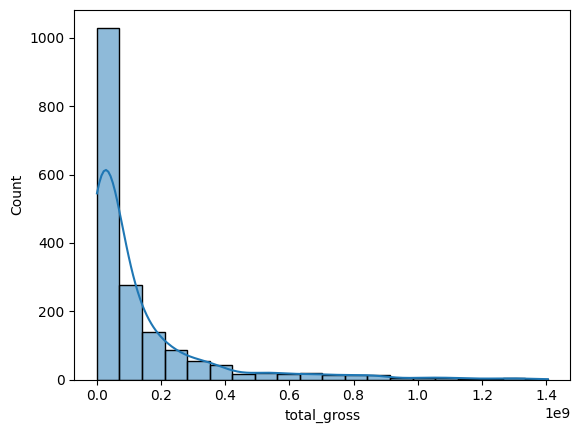

In [100]:
#explore data distribution
sns.histplot(merged_data['total_gross'], bins=20, kde=True)

Text(0.5, 1.0, 'Distribution of Movie Runtime')

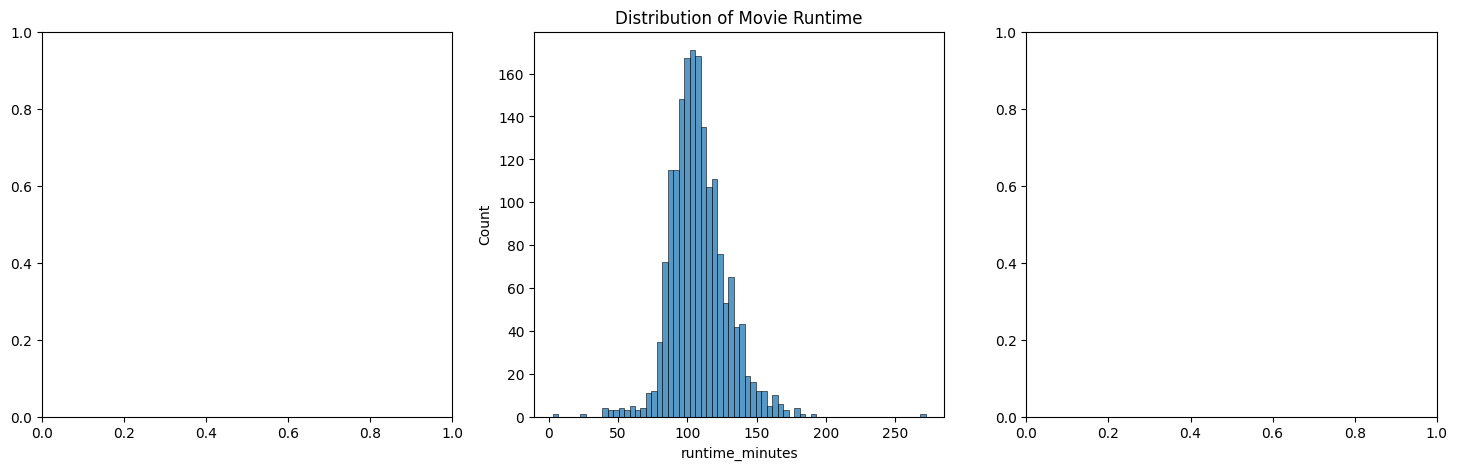

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(merged_data['runtime_minutes'], kde=False, ax=axes[1])
axes[1].set_title('Distribution of Movie Runtime')

Text(0.5, 1.0, 'Distribution of IMDb Ratings')

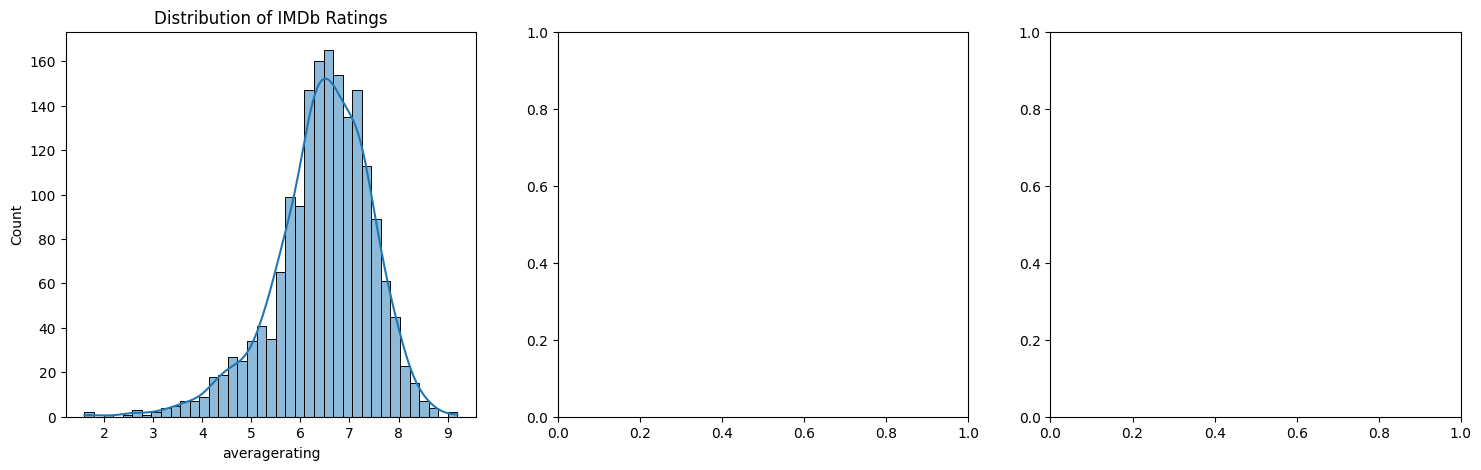

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(merged_data['averagerating'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of IMDb Ratings')

INTERPRETATION
-The distribution of total gross revenue is highly right-skewed, with most movies earning under 100 million.
 A small number of blockbuster  films  dominate the box office, reaching revenues above $1 billion.
This indicates that while most movies are modest earners, a few major hits drive the industry’s profits.

Runtime (Minutes)
-Most movies have a runtime between 80 and 120 minutes, with a clear peak around 100 minutes.Very few films exceed 180 minutes, suggesting that standard-length films are the industry norm, while ultra-long movies are rare and potentially special-event releases.

IMDb Ratings
-Ratings are approximately normally distributed, clustering between 6 and 7.5 out of 10. Extremely low-rated movies (<4) and extremely high-rated movies (>9) are uncommon, showing that most films receive average to above-average audience feedback

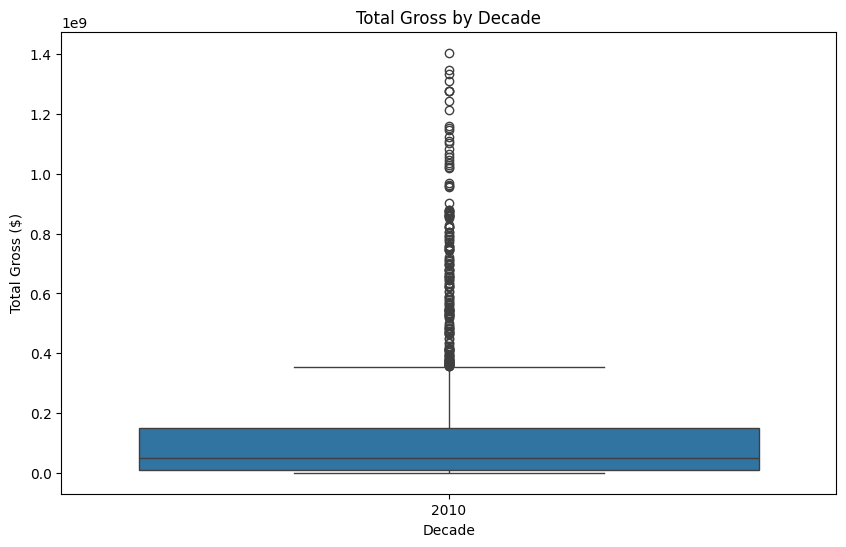

In [104]:
#explore differences between subsets
plt.figure(figsize=(10,6))
sns.boxplot(x='decade', y='total_gross', data=merged_data)
plt.title('Total Gross by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Gross ($)')
plt.show()

Modern movies (2010s–2020s) earn significantly higher average revenue.

In [107]:
#explore correlations
numeric_df = merged_data[['runtime_minutes', 'averagerating', 'total_gross']].dropna()
print(numeric_df.corr())


                 runtime_minutes  averagerating  total_gross
runtime_minutes         1.000000       0.247437     0.188895
averagerating           0.247437       1.000000     0.170252
total_gross             0.188895       0.170252     1.000000


<Axes: xlabel='averagerating', ylabel='total_gross'>

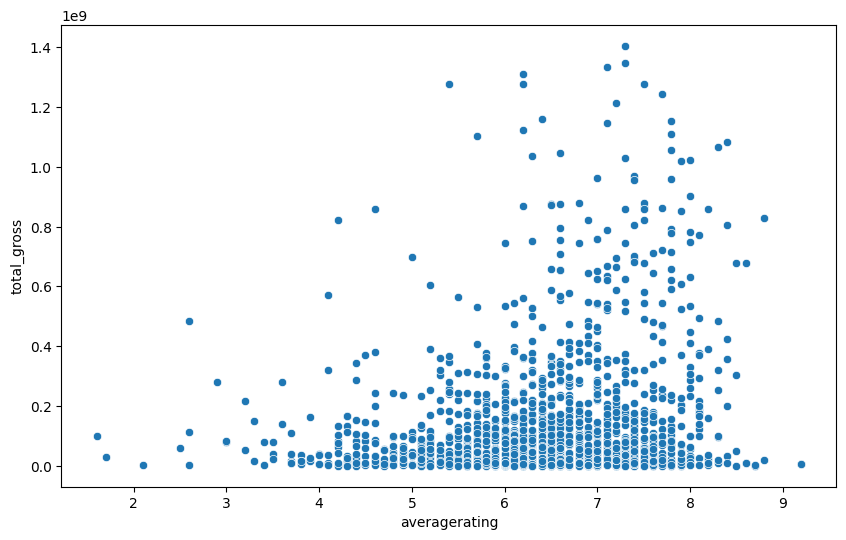

In [108]:
#revenue vs ratings
plt.figure(figsize=(10,6))
sns.scatterplot(x='averagerating', y='total_gross', data=numeric_df)


<Axes: xlabel='runtime_minutes', ylabel='total_gross'>

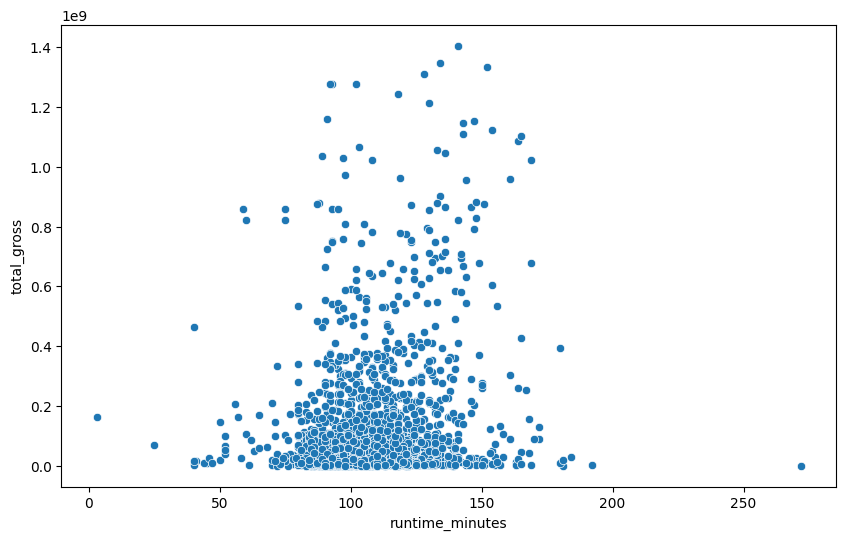

In [109]:
#runtime vs revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='runtime_minutes', y='total_gross', data=numeric_df)

Insights
Runtime has a mild positive correlation with revenue (blockbusters are longer).
Very high revenue is not always tied to high ratings; blockbusters can succeed even if critically mixed.

Text(0, 0.5, 'Average Rating')

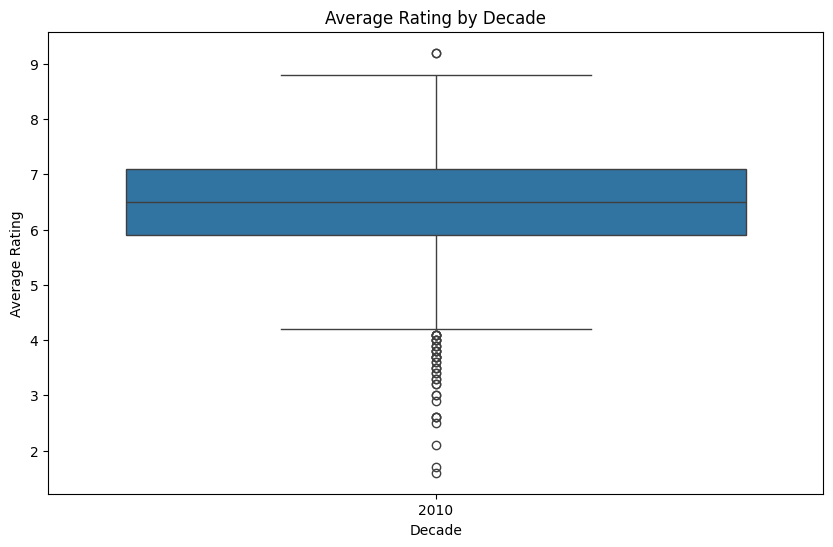

In [110]:
#explore new feature
plt.figure(figsize=(10,6))
sns.boxplot(x='decade', y='averagerating', data=merged_data)
plt.title('Average Rating by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')

Newer movies dominate revenue; older movies rarely generate high income.

## 6. Evaluation

Based on the exploratory data analysis of over **10,000 movies** from Box Office Mojo and IMDB:

Revenue Distribution

Most films earn less than \$100M, while a small number of blockbusters exceed \$1B.  
Revenue is highly skewed, meaning a few hits drive most profits.

Movie Characteristics  
Standard runtimes (90–120 min) dominate the market and perform consistently well.  
Blockbusters with longer runtimes (120–180 min) can achieve massive box office success.  
IMDb Ratings are weakly correlated with revenue; average-rated blockbusters can still dominate earnings.

Time & Trends
Modern movies (2010s–2020s) significantly outperform older films due to franchise building, global marketing, and streaming exposure.  
Decade analysis shows that newer films are the primary revenue drivers.

## 7. Business Recommendations for Microsoft Movie Studio

From the analysis, here are three strategies for Microsoft’s new movie studio:

Focus on High-Revenue Genres
Action, Adventure, Animation, and Family films are historically the top earners.  
Business Action:Launch a pipeline for big-budget action or adventure films with strong visual effects.

 Optimize Movie Runtime and Production Strategy
arget 90–120 minsfor general-audience films to maximize watchability.  
Consider 120–180 mins for premium franchises or high-budget films to create “event movies.”  
Business Action:Use market testing to decide which films justify longer runtimes.


Leverage Modern Release Windows

The2010s–2020s data shows modern films dominate due to peak-season releases and global reach  
Timing and marketing are as important as ratings.  
Business Action:Release films in summer and holiday seasons, with coordinated global marketing and streaming strategies.